In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model



In [10]:
def prepare_data(path, width,height,batch_size,class_Mode,ModelPath):
    trainGen = ImageDataGenerator(
                                 #vertical_flip=True,
                                 rescale=1/255,
                                 #horizontal_flip = True
                                  )
    test_prepare = trainGen.flow_from_directory(directory = path,target_size=(width,height),batch_size=batch_size,class_mode=class_Mode)
    model = load_model(ModelPath)
    return test_prepare,model


In [11]:
def predecation_case(img_path,m1,m2,m3):
    img = load_img(img_path,target_size=(224,224))
    input_arr = img_to_array(img)/255
    plt.imshow(input_arr)
    plt.show()
    input_arr=np.expand_dims(input_arr,axis=0)
    pred=m1.predict(input_arr)
    if pred>0.5:
        pred=m2.predict(input_arr)
        score =pred[0]
        print(labels[np.argmax(score)])
        print("This image is a Breast with most likely belongs to {} with a {:.2f} percent confidence."
              .format(labels[np.argmax(score)],100 * np.max(score)))
        
        
    else:
        pred=m3.predict(input_arr)
        if pred>0.5:
            print("This Image Is a Brain With Most Likely Belongs to Have a Tumor")
        else:
            print("This image Is a Brain With Most Likely Belongs to No Tumor")


In [12]:
%%html
<h1 style="font-size:50px;color:red;">breast MultiClass</h1>

In [12]:

pathTest_breast=r"D:\vision\final proj\content\breast-ultrasound-images-dataset\test"
labels=['benign','malignant','normal']


In [13]:
test_prepare1,model_breast=prepare_data(pathTest_breast,224,224,7,'categorical',"C://Users//solutions//Downloads//mymodel.h5")


Found 162 images belonging to 3 classes.


In [14]:
accuracy_score = model_breast.evaluate(test_prepare1)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

24/24 [==============================] - 36s 1s/step - loss: 0.2241 - accuracy: 0.9383
[0.22413530945777893, 0.9382715821266174]
Accuracy: 93.8272%
Loss:  0.22413530945777893


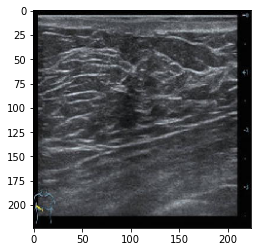

1/1 [==============================] - 8s 8s/step
normal
This image most likely belongs to normal with a 57.11 percent confidence.


In [15]:
path = r"C:\Users\solutions\Downloads\normal 1.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_breast.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

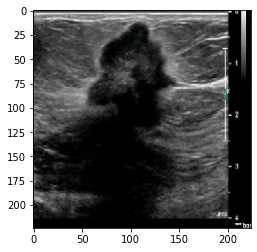

1/1 [==============================] - 0s 142ms/step
malignant
This image most likely belongs to malignant with a 100.00 percent confidence.


In [16]:
path = r"C:/Users/solutions/Downloads/mleg 2.jpeg"

       
       
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_breast.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

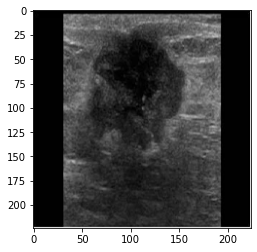

1/1 [==============================] - 0s 135ms/step
malignant
This image most likely belongs to malignant with a 99.89 percent confidence.


In [17]:
path = r"C:\Users\solutions\Downloads\mleg 1.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_breast.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

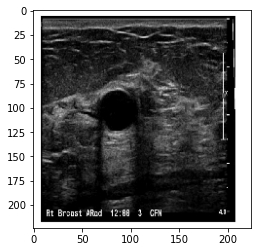

1/1 [==============================] - 0s 133ms/step
benign
This image most likely belongs to benign with a 100.00 percent confidence.


In [18]:
path =r"C:\Users\solutions\Downloads\beg 1.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_breast.predict(input_arr)
score =pred[0]
print(labels[np.argmax(score)])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

In [11]:
%%html
<h1 style="font-size:50px;color:red;">Brain Tumors</h1>

In [19]:
pathTest_brain=r"D:\vision\CV2023CSYSDataset\colabTest"
test_prepare2,model_brain=prepare_data(pathTest_brain,224,224,7,'binary',r"C:\Users\solutions\Downloads\brainTumor.h5")

Found 98 images belonging to 2 classes.


In [20]:
accuracy_score = model_brain.evaluate(test_prepare2)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

14/14 [==============================] - 2s 120ms/step - loss: 0.1498 - accuracy: 0.9592
[0.14981091022491455, 0.9591836929321289]
Accuracy: 95.9184%
Loss:  0.14981091022491455


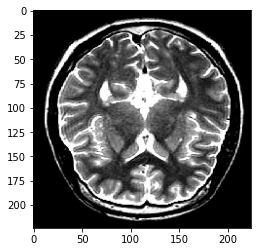

1/1 [==============================] - 1s 981ms/step
[[1.9959814e-05]]
dosent have Tumor


In [21]:
path = r"D:\vision\CV2023CSYSDataset\colabTest\NoTumor\no568.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_brain.predict(input_arr)
print(pred)
if pred>0.5:
  print("have a Tumor")
else:
  print("dosent have Tumor")


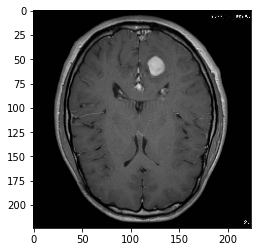

1/1 [==============================] - 0s 41ms/step
[[0.9998037]]
have a Tumor


In [23]:

path = r"D:\vision\CV2023CSYSDataset\colabTest\Tumor\y764.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_brain.predict(input_arr)
print(pred)
if pred>0.5:
  print("have a Tumor")
else:
  print("dosent have Tumor")


In [10]:
%%html
<h1 style="font-size:50px;color:red;">breast vs brain</h1>

In [30]:
pathTest_brain_breast=r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test"

test_prepare3,model_brain_breast=prepare_data(pathTest_brain,224,224,7,'binary',r"C:\Users\solutions\Downloads\BvsB.h5")

Found 98 images belonging to 2 classes.


In [41]:
accuracy_score = model_brain_breast.evaluate(test_prepare3)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))
 
print("Loss: ",accuracy_score[0])

14/14 [==============================] - 1s 84ms/step - loss: 4.6972 - accuracy: 0.5306
[4.697234153747559, 0.5306122303009033]
Accuracy: 53.0612%
Loss:  4.697234153747559


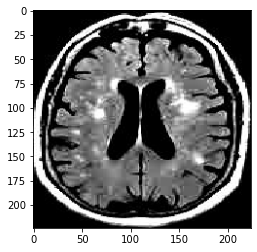

1/1 [==============================] - 0s 32ms/step
[[1.06802854e-16]]
brain


In [33]:
path = r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\brain\no1.jpg"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_brain_breast.predict(input_arr)
print(pred)
if pred>0.5:
  print("breast")
else:
  print("brain")

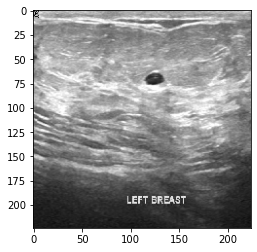

1/1 [==============================] - 0s 60ms/step
[[0.933703]]
breast


In [34]:
path = r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\breast\benign (1).png"
img = load_img(path,target_size=(224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()
input_arr=np.expand_dims(input_arr,axis=0)
pred=model_brain_breast.predict(input_arr)
print(pred)
if pred>0.5:
  print("breast")
else:
  print("brain")

In [9]:
%%html
<h1 style="font-size:50px;color:red;">Test Cases Run</h1>

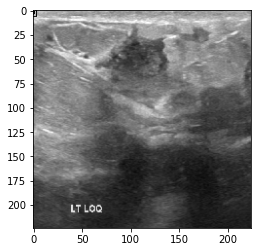

1/1 [==============================] - 0s 135ms/step
benign
This image is a Breast with most likely belongs to benign with a 65.37 percent confidence.


In [35]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\breast\benign (401).png"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


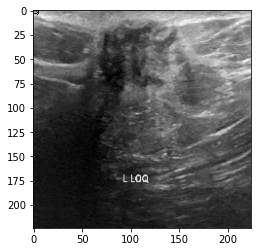

1/1 [==============================] - 0s 214ms/step
malignant
This image is a Breast with most likely belongs to malignant with a 100.00 percent confidence.


In [36]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\breast\malignant (207).png"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


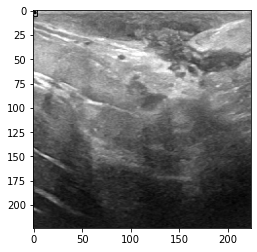

1/1 [==============================] - 0s 129ms/step
benign
This image is a Breast with most likely belongs to benign with a 99.67 percent confidence.


In [37]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\breast\benign (402).png"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


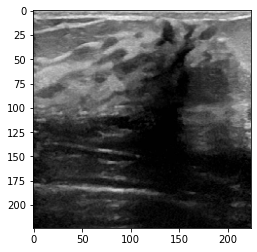

1/1 [==============================] - 0s 124ms/step
normal
This image is a Breast with most likely belongs to normal with a 100.00 percent confidence.


In [38]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\breast\normal (126).png"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


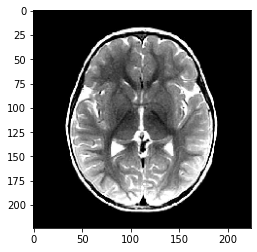

1/1 [==============================] - 0s 71ms/step
This image Is a Brain With Most Likely Belongs to No Tumor


In [39]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\brain\no0.jpg"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


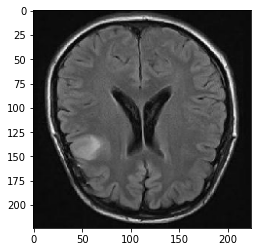

1/1 [==============================] - 0s 38ms/step
This Image Is a Brain With Most Likely Belongs to Have a Tumor


In [40]:
predecation_case(r"D:\vision\CV2023CSYSDataset\Brain vs breast\Test\brain\y756.jpg"
                 ,model_brain_breast
                 ,model_breast
                 ,model_brain)


In [8]:
%%html
<h1 style="font-size:50px;color:red;">Visualization</h1>

TypeError: 'clf' must be an instance of `CClassifier`.

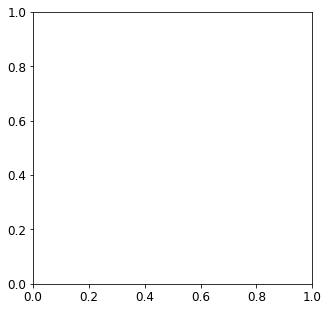